In [507]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import PrecisionRecallDisplay
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from seaborn.utils import plt
from sklearn.metrics import RocCurveDisplay


Load the dataset into a Pandas DataFrame.

In [508]:
data = pd.read_csv("./data/diabetes.csv")

### Exploratory Data Analysis (EDA)

In [509]:
# Show the first 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [510]:
data.shape

(768, 9)

In [511]:
# Check for missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [512]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [513]:
# Display basic statistics (mean, std, etc.).
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Insulin', ylabel='Count'>

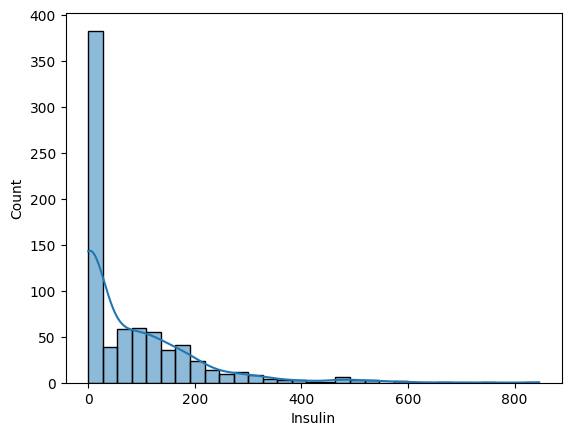

In [514]:
sns.histplot(data["Insulin"], kde=True)

<Axes: xlabel='Insulin'>

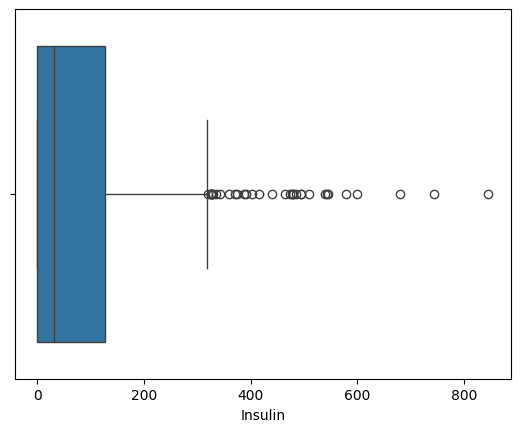

In [515]:
sns.boxplot(x=data["Insulin"])

<Axes: xlabel='Glucose'>

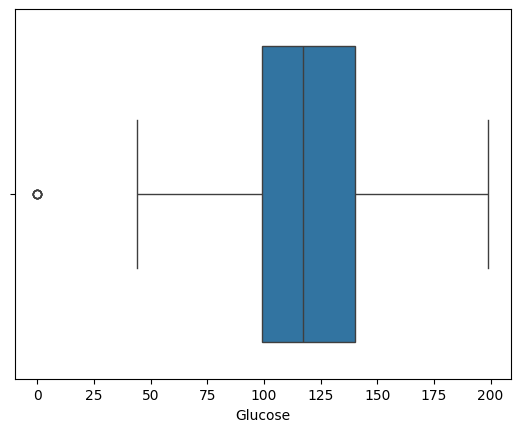

In [516]:
sns.boxplot(x=data["Glucose"])

<Axes: xlabel='Pregnancies'>

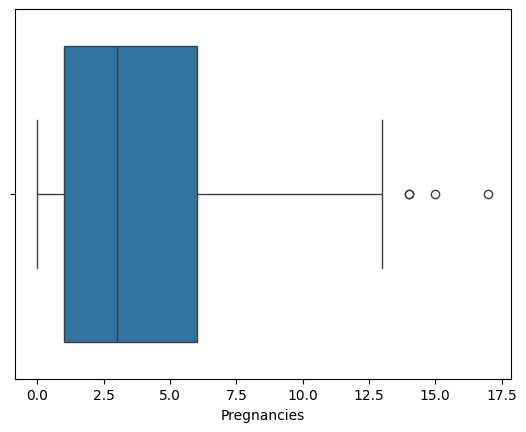

In [517]:
sns.boxplot(x=data["Pregnancies"])

In [518]:
X = data.drop(columns=["Outcome","DiabetesPedigreeFunction"])
y = data["Outcome"]

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [520]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

,copy,True
,with_mean,True
,with_std,True


### LogisticRegression

In [521]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)


0.7186147186147186

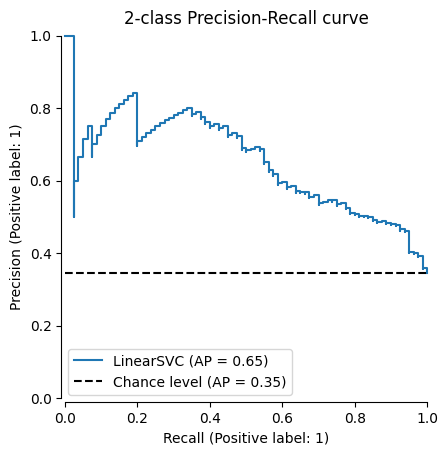

In [522]:
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="LinearSVC", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


#### ROC

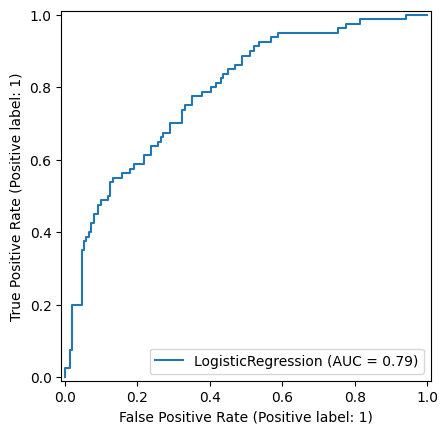

In [523]:
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

### DecisionTreeClassifier

In [524]:
clf_ = tree.DecisionTreeClassifier(max_depth=4)
clf_ = clf_.fit(X_train, y_train)


[Text(0.56, 0.9, 'x[1] <= 154.5\ngini = 0.455\nsamples = 537\nvalue = [349, 188]'),
 Text(0.32, 0.7, 'x[6] <= 28.5\ngini = 0.383\nsamples = 454\nvalue = [337, 117]'),
 Text(0.44000000000000006, 0.8, 'True  '),
 Text(0.16, 0.5, 'x[1] <= 127.5\ngini = 0.22\nsamples = 238\nvalue = [208, 30]'),
 Text(0.08, 0.3, 'x[5] <= 49.1\ngini = 0.117\nsamples = 192\nvalue = [180, 12]'),
 Text(0.04, 0.1, 'gini = 0.1\nsamples = 190\nvalue = [180, 10]'),
 Text(0.12, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.24, 0.3, 'x[2] <= 56.0\ngini = 0.476\nsamples = 46\nvalue = [28, 18]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.28, 0.1, 'gini = 0.433\nsamples = 41\nvalue = [28.0, 13.0]'),
 Text(0.48, 0.5, 'x[5] <= 26.95\ngini = 0.481\nsamples = 216\nvalue = [129, 87]'),
 Text(0.4, 0.3, 'x[6] <= 29.5\ngini = 0.13\nsamples = 43\nvalue = [40, 3]'),
 Text(0.36, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.44, 0.1, 'gini = 0.091\nsamples = 42\nvalue = [40, 2]'),
 Te

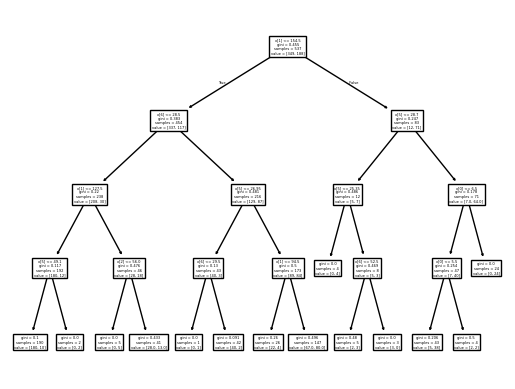

In [525]:
tree.plot_tree(clf_)


In [526]:
clf_.score(X_test, y_test)


0.70995670995671

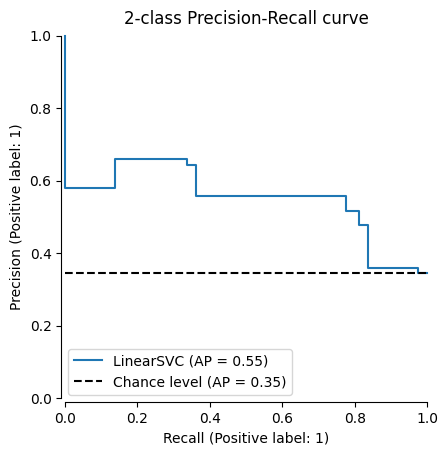

In [527]:
display = PrecisionRecallDisplay.from_estimator(
    clf_, X_test, y_test, name="LinearSVC", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


#### ROC

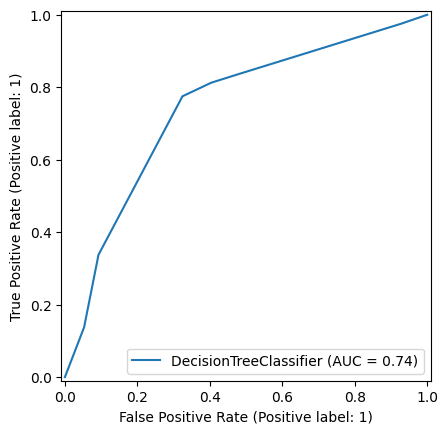

In [528]:
svc_disp = RocCurveDisplay.from_estimator(clf_, X_test, y_test)
plt.show()

#### Which model performs better?
-> Both model almost perform same here.

#### If the dataset is slightly imbalanced (more 0’s than 1’s), which metric (Precision or Recall) should be prioritized in diagnosing diabetes? Why?

<Axes: xlabel='Outcome', ylabel='Count'>

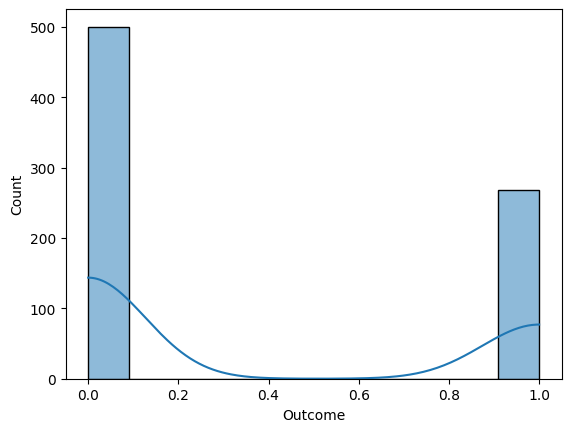

In [529]:
sns.histplot(data["Outcome"], kde=True)

Model predict more patient as non diabetic so we need to recheck/retest them